# Train Model

After prepared the dataset and load features on feature table, we'll training our machine learning model.

# 1. Libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime

from matplotlib import pyplot
%matplotlib inline
import seaborn as sns

import collections

from mlflow.tracking import MlflowClient

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score

# 2. Load Data

In [ ]:
from databricks.feature_store import FeatureStoreClient

fs = FeatureStoreClient()

# Get today date
retrieve_date = datetime.date.today()
# Using today date for time travel
customer_features_df = fs.read_table(name='fs_ecommerce.churn', as_of_delta_timestamp=str(retrieve_date))

In [ ]:
display(customer_features_df)

CustomerID,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile_Phone,PreferredLoginDevice_Phone,CityTier_1,CityTier_2,CityTier_3,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash_on_Delivery,PreferredPaymentMode_Credit_Card,PreferredPaymentMode_Debit_Card,PreferredPaymentMode_E_wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop_and_Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile_Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
50001,1,4.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,159.93,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
50002,1,9.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,120.9,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50003,1,9.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.28,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50004,1,0.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.07,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
50005,1,0.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,129.6,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50006,1,0.0,22.0,3.0,5.0,5.0,2.0,1.0,22.0,3.5,6.0,7.0,139.19,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
50007,1,9.0,11.0,2.0,3.0,2.0,4.0,0.0,14.0,0.0,1.0,0.0,120.86000000000001,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
50008,1,9.0,6.0,3.0,3.0,2.0,3.0,1.0,16.0,2.0,2.0,0.0,122.93,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
50009,1,13.0,9.0,3.0,4.0,3.0,2.0,1.0,14.0,0.0,1.0,2.0,126.83000000000001,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
50010,1,9.0,31.0,2.0,5.0,3.0,2.0,0.0,12.0,1.0,1.0,1.0,122.93,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
corr = customer_features_df.toPandas().drop(columns=['CustomerID']).corr()
corr.style.background_gradient(cmap='coolwarm')

Out[5]:

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile_Phone,PreferredLoginDevice_Phone,CityTier_1,CityTier_2,CityTier_3,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash_on_Delivery,PreferredPaymentMode_Credit_Card,PreferredPaymentMode_Debit_Card,PreferredPaymentMode_E_wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop_and_Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile_Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Churn,1.000000,-0.339678,0.073529,0.018861,0.105669,0.105481,0.042697,0.250188,-0.006856,-0.008644,-0.029832,-0.162501,-0.160194,0.051099,-0.111639,0.078916,-0.084946,0.016970,0.080395,0.028796,0.083933,-0.006178,-0.064131,-0.032453,0.055751,0.004163,-0.029264,0.029264,-0.014871,-0.089575,-0.133353,0.113364,0.154387,-0.054903,-0.024934,-0.151024,0.180847
Tenure,-0.339678,1.000000,-0.020914,-0.019195,-0.018833,-0.012767,0.240094,-0.022093,-0.006965,0.080694,0.138438,0.181369,0.467669,-0.039698,0.192909,-0.189730,0.052638,0.021381,-0.063858,-0.092384,-0.075099,0.088813,0.049793,0.017229,0.010411,-0.037011,0.045926,-0.045926,0.103387,0.347406,-0.054059,-0.169948,-0.233938,0.267624,0.038505,0.083250,-0.118690
WarehouseToHome,0.073529,-0.020914,1.000000,0.068421,0.023405,0.013683,-0.006917,0.030171,0.039745,0.015066,0.006686,0.025516,0.015089,0.017617,0.010377,-0.031895,-0.004590,-0.015420,0.011536,-0.023105,-0.007421,-0.008713,0.028865,-0.030999,0.038226,-0.004746,0.004521,-0.004521,0.034212,0.035639,0.048814,-0.056977,-0.020760,-0.076574,-0.005435,0.026006,-0.023676
HourSpendOnApp,0.018861,-0.019195,0.068421,1.000000,0.309324,0.030829,0.140625,0.006902,0.099769,0.270733,0.144500,0.065973,0.116313,-0.019015,0.139456,-0.147791,0.012775,-0.013914,-0.007089,-0.108281,-0.009371,0.002735,0.042586,0.023982,0.003347,-0.025082,0.017683,-0.017683,-0.007496,-0.044874,-0.038291,-0.175644,0.238199,-0.024765,0.013004,0.034730,-0.047167
NumberOfDeviceRegistered,0.105669,-0.018833,0.023405,0.309324,1.000000,-0.015235,0.086399,0.002910,0.065444,0.211962,0.123723,0.007018,0.141090,0.019154,0.110151,-0.154259,-0.024173,-0.004001,0.026765,-0.124101,-0.002563,0.019237,0.040981,-0.008746,0.025699,0.009085,0.022710,-0.022710,0.037329,-0.034211,-0.008118,-0.216178,0.170293,0.019976,-0.007517,-0.035205,0.043466
SatisfactionScore,0.105481,-0.012767,0.013683,0.030829,-0.015235,1.000000,0.054093,-0.031115,-0.027179,0.012604,0.004307,0.028225,0.003386,-0.036049,-0.007636,0.048821,0.006256,0.022742,-0.016481,0.002857,0.021234,0.013670,0.020594,-0.050365,0.017752,0.008063,0.035220,-0.035220,0.011944,0.002287,-0.019501,0.005493,0.005577,0.001442,0.058064,-0.023576,-0.019314
NumberOfAddress,0.042697,0.240094,-0.006917,0.140625,0.086399,0.054093,1.000000,-0.027512,0.010420,0.065244,-0.009940,-0.071192,0.196308,-0.029848,0.129039,-0.123296,0.024870,0.009826,-0.030050,-0.066279,-0.011835,-0.010824,0.054840,-0.003009,-0.017108,0.005564,0.033768,-0.033768,0.045035,0.073234,0.044155,-0.151471,-0.033151,0.051002,-0.002406,0.014478,-0.013656
Complain,0.250188,-0.022093,0.030171,0.006902,0.002910,-0.031115,-0.027512,1.000000,-0.003884,-0.006949,-0.017721,-0.039401,0.003043,-0.001327,-0.001381,0.003128,-0.000373,-0.013477,0.006318,0.007734,-0.014367,-0.008459,-0.003238,-0.009009,0.011450,0.021183,0.040269,-0.040269,0.007419,0.013917,-0.021304,0.006186,0.011191,-0.013429,0.007044,-0.003720,-0.001422
OrderAmountHikeFromlastYear,-0.006856,-0.006965,0.039745,0.099769,0.065444,-0.027179,0.010420,-0.003884,1.000000,0.057339,0.016846,-0.002469,-0.002707,0.012671,-0.002496,-0.010895,0.034970,-0.034356,-0.021049,-0.033322,-0.031847,-0.011144,0.046176,0.010808,-0.034421,0.006825,0.001562,-0.001562,0.010818,-0.01

# 3. Train - Validation - Test Split
Split the input data into 3 sets:
- Train (60% of the dataset used to train the model)
- Validation (20% of the dataset used to tune the hyperparameters of the model)
- Test (20% of the dataset used to report the true performance of the model on an unseen dataset)

In [ ]:
SEED = 2022

customer_features_pd = customer_features_df.toPandas()
# Target column
target_col = "Churn"
# Features
split_X = customer_features_pd.drop([target_col, 'CustomerID'], axis=1)
# Target Series
split_y = customer_features_pd[target_col]

In [ ]:
from sklearn.model_selection import train_test_split

# Split train_val and test datasets
X_train, X_val_test, y_train, y_val_test = train_test_split(split_X, split_y, train_size=0.6, random_state=SEED, stratify=split_y)
# Split train and validation datasets
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=0.5, random_state=SEED, stratify=y_val_test)

# Check distribution
dist_arr = []
arr_y = [('training', y_train), ('validation', y_val), ('test', y_test)]

for dataset_name, dist in arr_y:
    c = collections.Counter(dist)
    total = c[0] + c[1]
    dist_arr.append({'dataset':dataset_name, '0': c[0] / total, '1': c[1] / total, 'total': total})

split_ds = pd.DataFrame(dist_arr)
split_ds['%'] = split_ds['total'] / split_ds['total'].sum()
split_ds

Out[7]:

,dataset,0,1,total,%
0,training,0.831557,0.168443,3378,0.6
1,validation,0.832149,0.167851,1126,0.2
2,test,0.831261,0.168739,1126,0.2


# 4. Train classification model

Baseline model created by Databricks AutoML:
```
xgbc_classifier = XGBClassifier(
  colsample_bytree=0.44193345569952586,
  learning_rate=0.06282864067255331,
  max_depth=5,
  min_child_weight=18,
  n_estimators=771,
  n_jobs=100,
  subsample=0.5933268876765794,
  verbosity=0,
  random_state=9871075,
)
```

In [ ]:
import mlflow
import sklearn
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

set_config(display="diagram")

# Scale all feature columns to be centered around zero with unit variance.
standardizer = StandardScaler()

# Model
xgbc_classifier = XGBClassifier(
  colsample_bytree=0.44193345569952586,
  learning_rate=0.06282864067255331,
  max_depth=5,
  min_child_weight=18,
  n_estimators=771,
  n_jobs=100,
  subsample=0.5933268876765794,
  verbosity=0,
  random_state=9871075,
)

# Create a separate pipeline to transform the validation dataset. This is used for early stopping.
pipeline = Pipeline([("standardizer", standardizer)])

# Pipeline Model
model = Pipeline([("standardizer", standardizer), ("classifier", xgbc_classifier)])

model

Out[9]:

Pipeline Pipeline(steps=[('standardizer', StandardScaler()),
 ('classifier',
 XGBClassifier(base_score=None, booster=None,
 colsample_bylevel=None, colsample_bynode=None,
 colsample_bytree=0.44193345569952586,
 enable_categorical=False, gamma=None,
 gpu_id=None, importance_type=None,
 interaction_constraints=None,
 learning_rate=0.06282864067255331,
 max_delta_step=None, max_depth=5,
 min_child_weight=18, missing=nan,
 monotone_constraints=None, n_estimators=771,
 n_jobs=100, num_parallel_tree=None,
 predictor=None, random_state=9871075,
 reg_alpha=None, reg_lambda=None,
 scale_pos_weight=None,
 subsample=0.5933268876765794, tree_method=None,
 validate_parameters=None, verbosity=0))]) StandardScaler StandardScaler() XGBClassifier XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
 colsample_bynode=None, colsample_bytree=0.44193345569952586,
 enable_categorical=False, gamma=None, gpu_id=None,
 importance_type=None, interaction_constraints=None,
 learning_rate=0.06282864067255331, max_delta_step=None,
 max_depth=5, min_child_weight=18, missing=nan,
 monotone_constraints=None, n_estimators=771, n_jobs=100,
 num_parallel_tree=None, predictor=None, random_state=9871075,
 reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
 subsample=0.5933268876765794, tree_method=None,
 validate_parameters=None, verbosity=0)

In [ ]:
mlflow.sklearn.autolog(disable=True)
pipeline.fit(X_train, y_train)
X_val_processed = pipeline.transform(X_val)

In [ ]:
# Enable automatic logging of input samples, metrics, parameters, and models
mlflow.sklearn.autolog(log_input_examples=True, silent=True)

with mlflow.start_run(run_name="xgboost_v4") as mlflow_run:
    model.fit(X_train, y_train, classifier__eval_set=[(X_val_processed, y_val)], classifier__verbose=False)
    
    # Training metrics are logged by MLflow autologging
    # Log metrics for the validation set
    xgbc_val_metrics = mlflow.sklearn.eval_and_log_metrics(model, X_val, y_val, prefix="val_")
    # Log metrics for the test set
    xgbc_test_metrics = mlflow.sklearn.eval_and_log_metrics(model, X_test, y_test, prefix="test_")
    
    # Display the logged metrics
    xgbc_val_metrics = {k.replace("val_", ""): v for k, v in xgbc_val_metrics.items()}
    xgbc_test_metrics = {k.replace("test_", ""): v for k, v in xgbc_test_metrics.items()}
    display(pd.DataFrame([xgbc_val_metrics, xgbc_test_metrics], index=["validation", "test"]))

/databricks/python/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
 warnings.warn(label_encoder_deprecation_msg, UserWarning)

precision_score,recall_score,f1_score,accuracy_score,log_loss,roc_auc_score,score
0.9136000156821155,0.9174067495559503,0.9139499490568275,0.9174067495559503,0.22079859247903025,0.9347856775818355,0.9174067495559503
0.9054111057518509,0.9094138543516874,0.9064784731488015,0.9094138543516874,0.23072674398047463,0.9305161943319838,0.9094138543516874


### 4.1 Train models using the Databricks Feature Store

In [ ]:
from databricks.feature_store import FeatureLookup

feature_table = 'fs_ecommerce.churn'
key = 'CustomerID'
feature_names = customer_features_df.drop(*['CustomerID', 'Churn']).columns

feature_lookups = [FeatureLookup(table_name=f"{feature_table}", 
                                 feature_names=feature_names, 
                                 lookup_key=f"{key}")]

with mlflow.start_run(run_name="xgboost_v5") as mlflow_run:

    # Create a training set
    training_set = fs.create_training_set(
        customer_features_df.select(['CustomerID','Churn']),
        feature_lookups = feature_lookups,
        label = 'Churn',
        exclude_columns = ['CustomerID'])

    # Load data from training set
    training_df = training_set.load_df().toPandas()    
    
    X_train = training_df.drop(['Churn'], axis=1)
    y_train = training_df.Churn
    
    model.fit(X_train, y_train, classifier__eval_set=[(X_val_processed, y_val)], classifier__verbose=False)
    
    fs.log_model(model,
                 'train_model',
                  flavor=mlflow.sklearn,
                  training_set=training_set,
                  registered_model_name='churn_prediction')
    
    # Training metrics are logged by MLflow autologging
    # Log metrics for the validation set
    xgbc_val_metrics = mlflow.sklearn.eval_and_log_metrics(model, X_val, y_val, prefix="val_")
    # Log metrics for the test set
    xgbc_test_metrics = mlflow.sklearn.eval_and_log_metrics(model, X_test, y_test, prefix="test_")
    
    # Display the logged metrics
    xgbc_val_metrics = {k.replace("val_", ""): v for k, v in xgbc_val_metrics.items()}
    xgbc_test_metrics = {k.replace("test_", ""): v for k, v in xgbc_test_metrics.items()}
    display(pd.DataFrame([xgbc_val_metrics, xgbc_test_metrics], index=["validation", "test"]))

/databricks/python/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
 warnings.warn(label_encoder_deprecation_msg, UserWarning)
Registered model 'churn_prediction' already exists. Creating a new version of this model...
2022/07/05 22:29:09 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: churn_prediction, version 3
Created version '3' of model 'churn_prediction'.

precision_score,recall_score,f1_score,accuracy_score,log_loss,roc_auc_score,score
0.9649490408896569,0.9653641207815276,0.9645373322942079,0.9653641207815276,0.11929790559405715,0.989367168662793,0.9653641207815276
0.9556598403309695,0.9564831261101243,0.9553454086190262,0.9564831261101243,0.12690528786579292,0.9880285650022492,0.9564831261101243


# 5. Feature importance

In [ ]:
# Set this flag to True and re-run the notebook to see the SHAP plots
shap_enabled = True

"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is not" with a literal. Did you mean "!="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is not" with a literal. Did you mean "!="?
 0%| | 0/10 [00:00<?, ?it/s]

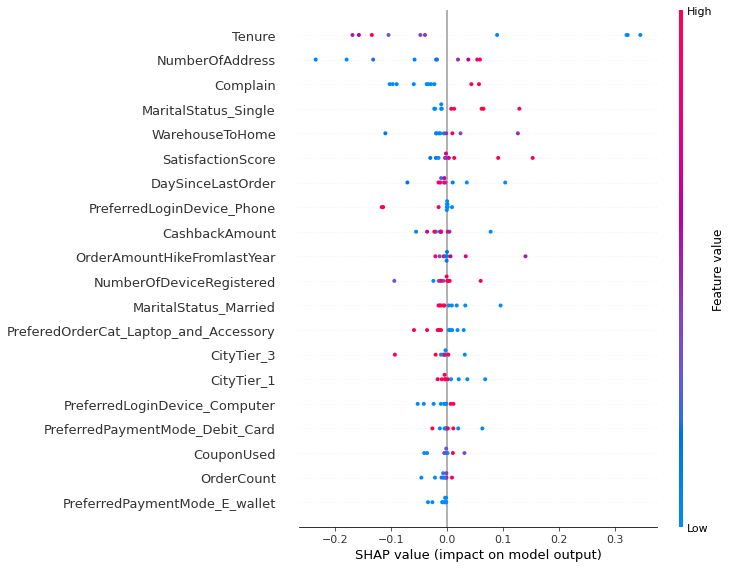

In [ ]:
if shap_enabled:
    from shap import KernelExplainer, summary_plot
    # Sample background data for SHAP Explainer. Increase the sample size to reduce variance.
    train_sample = X_train.sample(n=min(100, len(X_train.index)))

    # Sample a single example from the validation set to explain. Increase the sample size and rerun for more thorough results.
    example = X_val.sample(n=10)

    # Use Kernel SHAP to explain feature importance on the example from the validation set.
    predict = lambda x: model.predict(pd.DataFrame(x, columns=X_train.columns))
    explainer = KernelExplainer(predict, train_sample, link="identity")
    shap_values = explainer.shap_values(example, l1_reg=False)
    summary_plot(shap_values, example, class_names=model.classes_)

### Register to Model Registry

[The MLflow Model Registry](https://docs.databricks.com/applications/mlflow/model-registry.html) is a collaborative hub where teams can share ML models, work together from experimentation to online testing and production, integrate with approval and governance workflows, and monitor ML deployments and their performance. The snippets below show how to add the model trained in this notebook to the model registry and to retrieve it later for inference.

By registering this model in Model Registry, you can easily reference the model from anywhere within Databricks.

The following section shows how to do this programmatically, but you can also register a model using the UI.

In [ ]:
#run_id = mlflow.search_runs(filter_string='tags.mlflow.runName = "xgboost_v4"').iloc[0].run_id

#model_name = "churn_prediction"
#model_version = mlflow.register_model(f"runs:/{run_id}/xgboost_v4", model_name)

## Inference

### Load from Model Registry

In [ ]:
# model_uri for the generated model
print(f"runs:/{ mlflow_run.info.run_id }/model")

runs:/3657a9c946844dbf87741517a0f16ed8/model

In [ ]:
logged_model = 'runs:/9caf0c05424c42e99dee6519d2ec1b74/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
predicted_score = loaded_model.predict(split_X)

predicted_score[:50]

Out[82]: array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
 0, 1, 1, 0, 0, 0])

Batch Inferene with FeatureStoreClient.score_batch()

In [ ]:
prediction = fs.score_batch(model_uri="models:/churn_prediction/3",
                            df=customer_features_df.select('CustomerID'))

display(prediction)

CustomerID,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile_Phone,PreferredLoginDevice_Phone,CityTier_1,CityTier_2,CityTier_3,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash_on_Delivery,PreferredPaymentMode_Credit_Card,PreferredPaymentMode_Debit_Card,PreferredPaymentMode_E_wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop_and_Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile_Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,prediction
50001,4.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,159.93,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50002,9.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,120.9,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
50003,9.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.28,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
50004,0.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.07,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
50005,0.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,129.6,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
50006,0.0,22.0,3.0,5.0,5.0,2.0,1.0,22.0,3.5,6.0,7.0,139.19,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
50007,9.0,11.0,2.0,3.0,2.0,4.0,0.0,14.0,0.0,1.0,0.0,120.86000000000001,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50008,9.0,6.0,3.0,3.0,2.0,3.0,1.0,16.0,2.0,2.0,0.0,122.93,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
50009,13.0,9.0,3.0,4.0,3.0,2.0,1.0,14.0,0.0,1.0,2.0,126.83000000000001,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
50010,9.0,31.0,2.0,5.0,3.0,2.0,0.0,12.0,1.0,1.0,1.0,122.93,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
